# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setup query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Create Lists for Data
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Setup count
count = 0
set_count = 1

#loop to create dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count > 48:
            count = 1
            set_count += 1
            city_list.append(city)
        else:
            count += 1
            city_list.append(city)
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | totness
Processing Record 4 of Set 1 | novikovo
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | veraval
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | bukachacha
City not found. Skipping...
Processing Record 10 of Set 1 | naryan-mar
Processing Record 11 of Set 1 | vahan
Processing Record 12 of Set 1 | vaini
City not found. Skipping...
Processing Record 13 of Set 1 | mocuba
Processing Record 14 of Set 1 | honiara
Processing Record 15 of Set 1 | lakatoro
Processing Record 16 of Set 1 | barra patuca
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | snyder
Processing Record 21 of Set 1 | busselton
City not found. Skipping...
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1

Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | albania
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | guiyang
Processing Record 46 of Set 4 | marzuq
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | diffa
Processing Record 49 of Set 4 | dengfeng
Processing Record 1 of Set 5 | coos bay
City not found. Skipping...
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | metro
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | palana
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 5 | labuhan
Processing Record 8 of Set 5 | harper
City not found. Skipping...
Processing Record 9 of Set 5 | sarab
Processing Record 10 of Set 5 | dubbo
Processing Record 11 of Set 5 | touros
Processing Record 12 of Set 5 | tateyama
Processing Reco

City not found. Skipping...
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | senneterre
Processing Record 40 of Set 8 | micco
Processing Record 41 of Set 8 | zapolyarnyy
Processing Record 42 of Set 8 | sitio novo do tocantins
Processing Record 43 of Set 8 | gudari
Processing Record 44 of Set 8 | alyangula
City not found. Skipping...
Processing Record 45 of Set 8 | tugulym
Processing Record 46 of Set 8 | sassandra
Processing Record 47 of Set 8 | roebourne
Processing Record 48 of Set 8 | prieska
Processing Record 49 of Set 8 | rabo de peixe
Processing Record 1 of Set 9 | yeppoon
Processing Record 2 of Set 9 | algeciras
City not found. Skipping...
Processing Record 3 of Set 9 | dingzhou
Processing Record 4 of Set 9 | ixtapa
Processing Record 5 of Set 9 | sao goncalo do amarante
Processing Record 6 of Set 9 | san cristobal
Processing Record 7 of Set 9 | amapa
Processing Record 8 of Set 9 | dhidhdhoo
Processing Record 9 of Set 9 | kirakira
Processing Record 10 of S

Processing Record 22 of Set 12 | crestview
Processing Record 23 of Set 12 | cullman
Processing Record 24 of Set 12 | skjervoy
Processing Record 25 of Set 12 | yershov
Processing Record 26 of Set 12 | saint-louis
Processing Record 27 of Set 12 | xingyi
Processing Record 28 of Set 12 | kardla
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | padang
Processing Record 31 of Set 12 | sabha
Processing Record 32 of Set 12 | saint anthony
Processing Record 33 of Set 12 | gbadolite
Processing Record 34 of Set 12 | nizhnekamsk
Processing Record 35 of Set 12 | sayansk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dictionary for DataFrame
weather_dict = {"City": city_list,
               "Latitude": lat,
               "Longitude": lng,
               "Max Temp.": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind Speed": wind_speed,
               "Country": country,
               "Date": date}

#Create DataFrame
weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,okhotsk,59.3833,143.3000,9.86,85,100,25.97,RU,1612684428
1,faya,18.3851,42.4509,59.00,62,0,5.75,SA,1612684428
2,totness,5.8833,-56.3167,75.43,89,68,9.86,SR,1612684428
3,novikovo,51.1537,37.8879,3.25,89,36,10.38,RU,1612684429
4,vila velha,-20.3297,-40.2925,70.00,94,90,8.05,BR,1612684429


In [6]:
#Export to csv file
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
test_data = weather_df["Humidity"].describe(include = "all")
test_data

#No reason to go on since there are no cities that have humidity > 100%

count    574.000000
mean      72.834495
std       20.381581
min       11.000000
25%       64.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

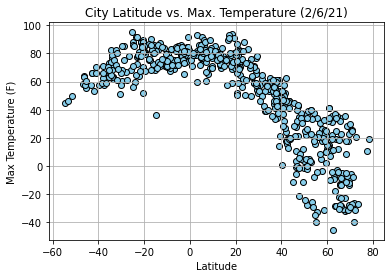

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp."], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Max. Temperature (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Figures/latitude_temperature_plot.png")

## Latitude vs. Humidity Plot

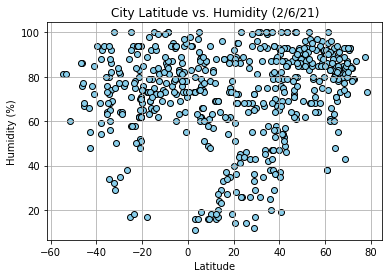

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Figures/latitude_humidity_plot.png")

## Latitude vs. Cloudiness Plot

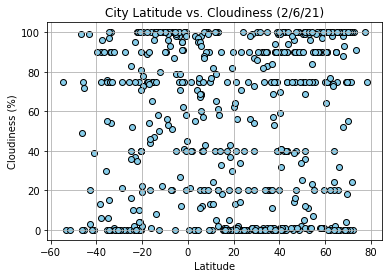

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Cloudiness (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Figures/latitude_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

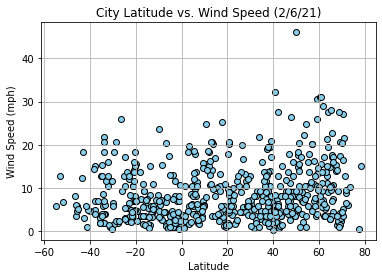

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Wind Speed (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Figures/latitude_windspeed_plot.png")

## Linear Regression

In [12]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = -1.43x + 95.28
The r value is: 0.7435566644703677


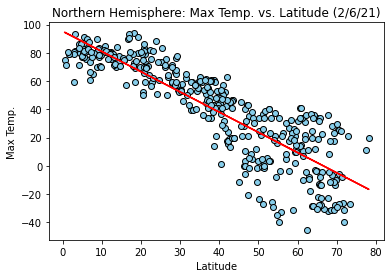

In [13]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_maxtemp_latitude_lr.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = 0.42x + 82.87
The r value is: 0.28498957975459777


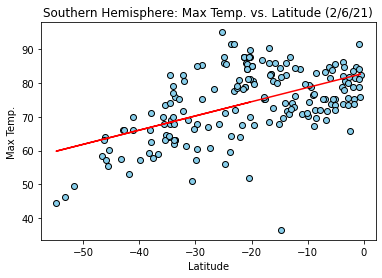

In [14]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_maxtemp_latitude_lr.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.38x + 57.34
The r value is: 0.12353954228287459


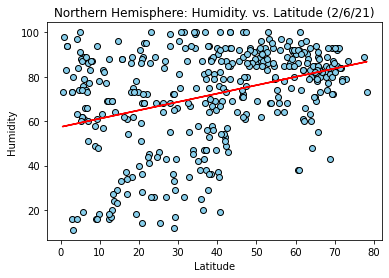

In [15]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Humidity. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_humidity_latitude_lr.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.27x + 80.38
The r value is: 0.04998509959659246


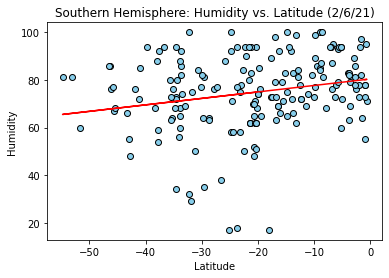

In [16]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Humidity vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_humidity_latitude_lr.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 0.38x + 36.09
The r value is: 0.03790073894334161


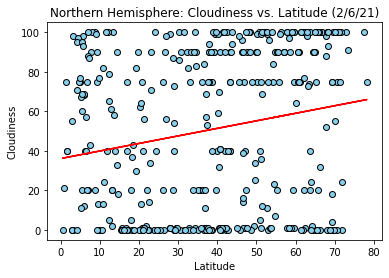

In [17]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Cloudiness vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_cloudiness_latitude_lr.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 1.07x + 76.93
The r value is: 0.12816691019404983


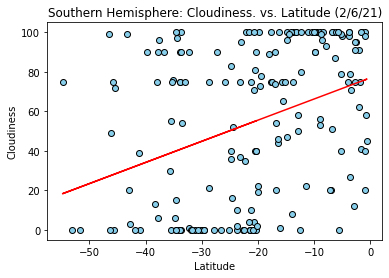

In [18]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Cloudiness. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_cloudiness_latitude_lr.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = 0.05x + 7.45
The r value is: 0.024121239905174813


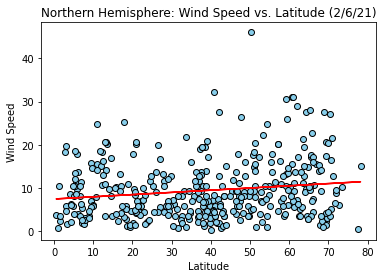

In [19]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Wind Speed vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_windspeed_latitude_lr.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = -0.07x + 5.76
The r value is: 0.028118723716785716


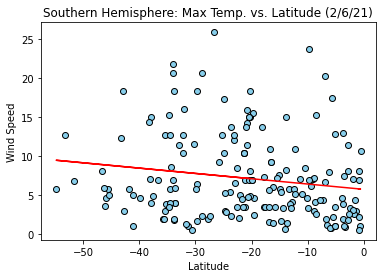

In [20]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_windspeed_latitude_lr.png")